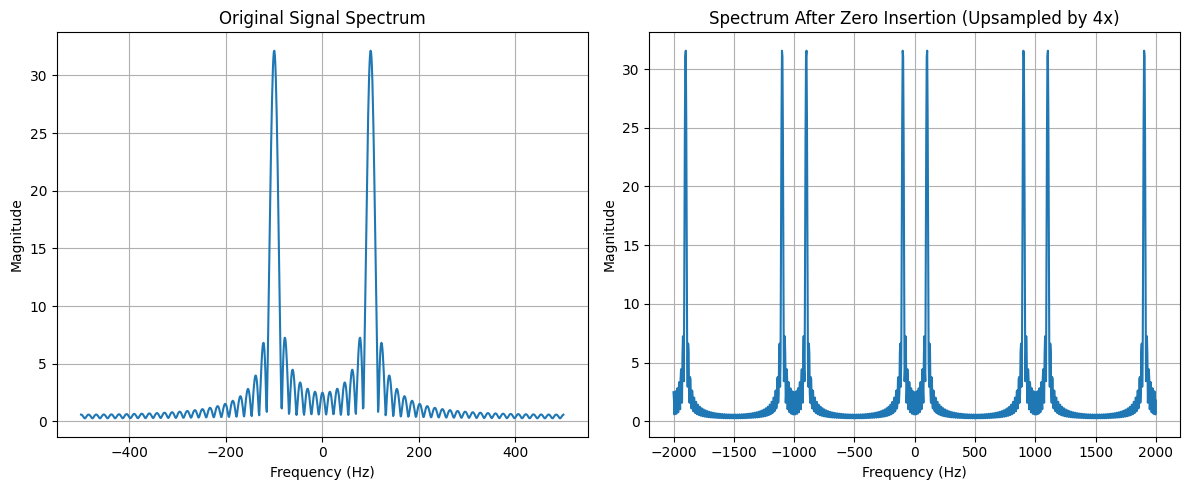

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

# Parameters
fs = 1000          # Original sampling rate (Hz)
f0 = 100           # Signal frequency (Hz)
N = 64             # Number of original samples
L = 4              # Upsampling factor (number of zeros inserted between samples)

# 1. Generate original sine wave
n = np.arange(N)
x = np.sin(2 * np.pi * f0 / fs * n)

# 2. Upsample by inserting zeros
x_up = np.zeros(N * L)
x_up[::L] = x  # Insert original samples every L positions

# 3. Compute FFT and apply fftshift
X = fftshift(np.abs(fft(x, 1024)))
X_up = fftshift(np.abs(fft(x_up, 1024)))

# 4. Frequency axis
freq = np.linspace(-0.5, 0.5, len(X)) * fs
freq_up = np.linspace(-0.5, 0.5, len(X_up)) * fs * L  # Frequency span increases after upsampling

# 5. Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(freq, X)
plt.title("Original Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freq_up, X_up)
plt.title(f"Spectrum After Zero Insertion (Upsampled by {L}x)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

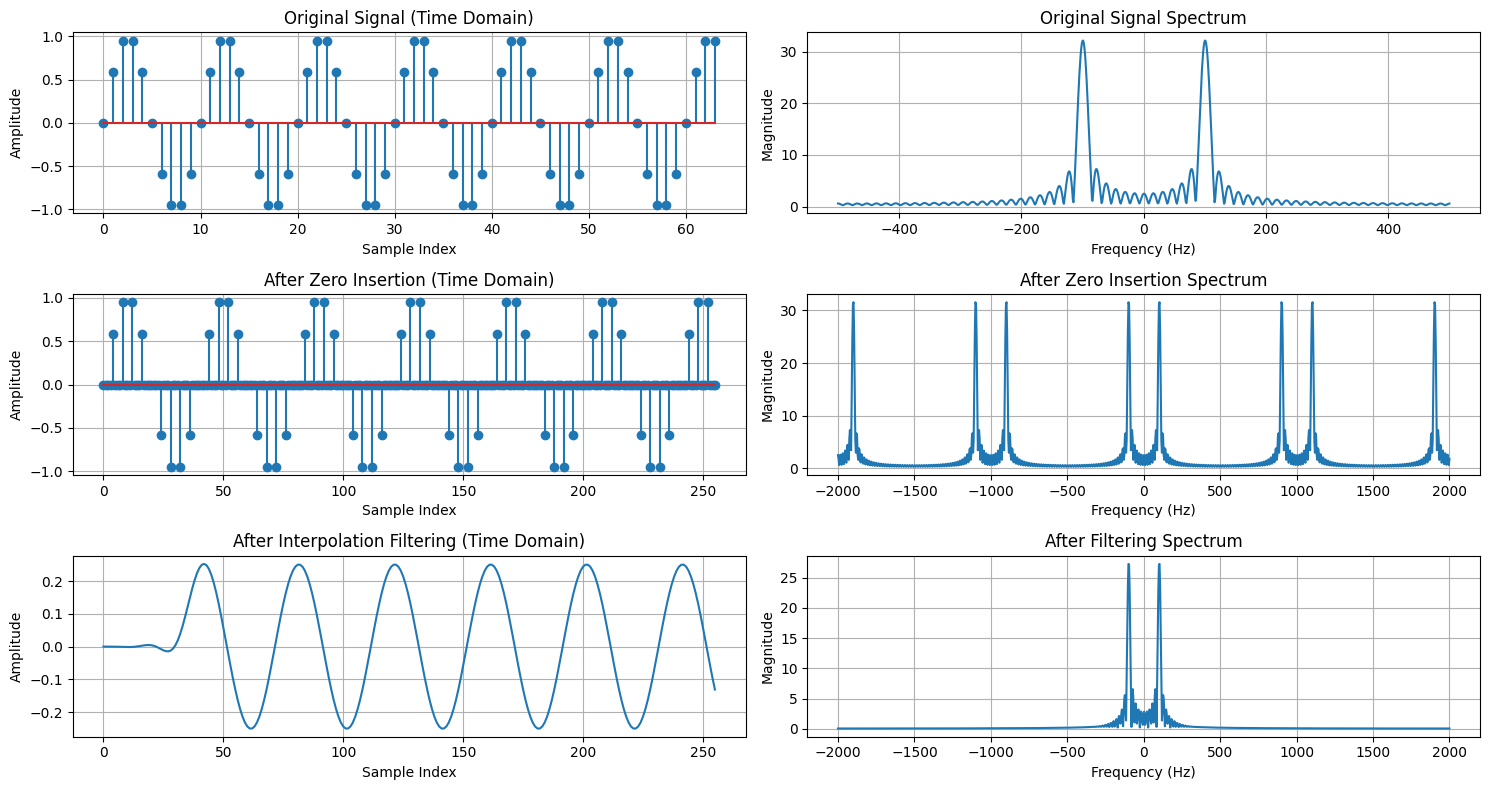

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
from scipy.signal import firwin, lfilter

# Parameters
fs = 1000          # Original sampling rate (Hz)
f0 = 100           # Signal frequency (Hz)
N = 64             # Original sample count
L = 4              # Upsampling factor

# 1. Generate original signal
n = np.arange(N)
x = np.sin(2 * np.pi * f0 / fs * n)

# 2. Upsample by inserting zeros
x_up = np.zeros(N * L)
x_up[::L] = x  # Zero-stuffing

# 3. Design a low-pass FIR filter (cutoff at 0.5 / L, normalized frequency)
numtaps = 64
cutoff = 0.5 / L  # normalized (Nyquist = 0.5)
h = firwin(numtaps, cutoff)

# 4. Apply the interpolation (low-pass) filter
x_interp = lfilter(h, 1.0, x_up)

# 5. Frequency domain (FFT)
X = fftshift(np.abs(fft(x, 1024)))
X_up = fftshift(np.abs(fft(x_up, 1024)))
X_interp = fftshift(np.abs(fft(x_interp, 1024)))

# Frequency axes
freq = np.linspace(-0.5, 0.5, len(X)) * fs
freq_up = np.linspace(-0.5, 0.5, len(X_up)) * fs * L

# 6. Plot time domain
plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
plt.stem(x)
plt.title("Original Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 3)
plt.stem(x_up)
plt.title("After Zero Insertion (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(x_interp)
plt.title("After Interpolation Filtering (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()

# 7. Plot frequency domain
plt.subplot(3, 2, 2)
plt.plot(freq, X)
plt.title("Original Signal Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(freq_up, X_up)
plt.title("After Zero Insertion Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(freq_up, X_interp)
plt.title("After Filtering Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

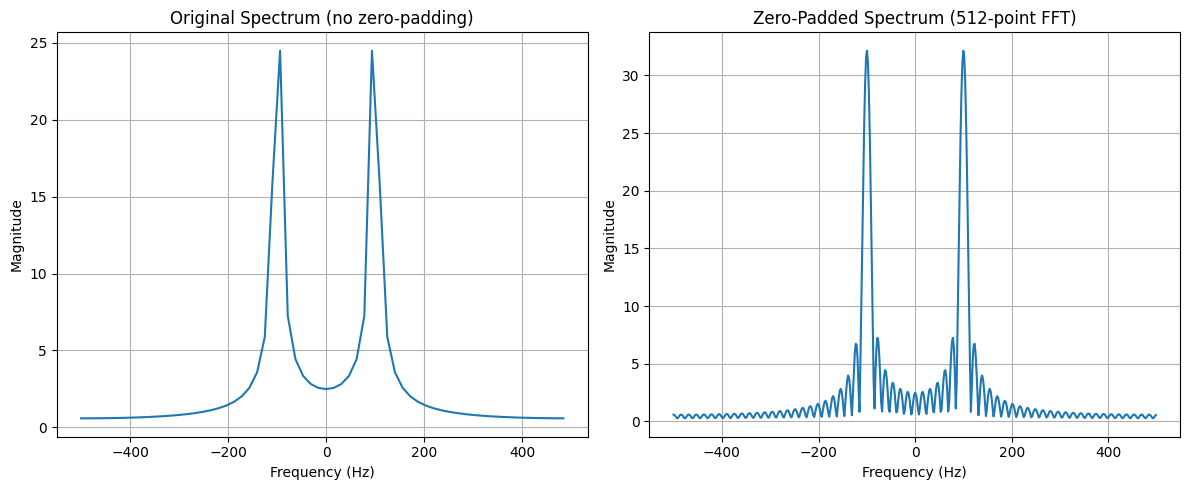

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# 原始信号参数
fs = 1000            # 采样率
N = 64               # 原始采样点数
f0 = 100             # 信号频率

# 生成正弦信号
t = np.arange(N) / fs
x = np.sin(2 * np.pi * f0 * t)

# 原始FFT
X = fftshift(np.abs(fft(x)))
freq = fftshift(fftfreq(N, d=1/fs))

# 末尾补 0 后的FFT（如补到 512 点）
N_pad = 512
x_padded = np.pad(x, (0, N_pad - N))
X_pad = fftshift(np.abs(fft(x_padded)))
freq_pad = fftshift(fftfreq(N_pad, d=1/fs))

# 绘图
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
#plt.stem(freq, X, basefmt=" ")
plt.plot(freq, X)
plt.title("Original Spectrum (no zero-padding)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(freq_pad, X_pad)
plt.title("Zero-Padded Spectrum (512-point FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()